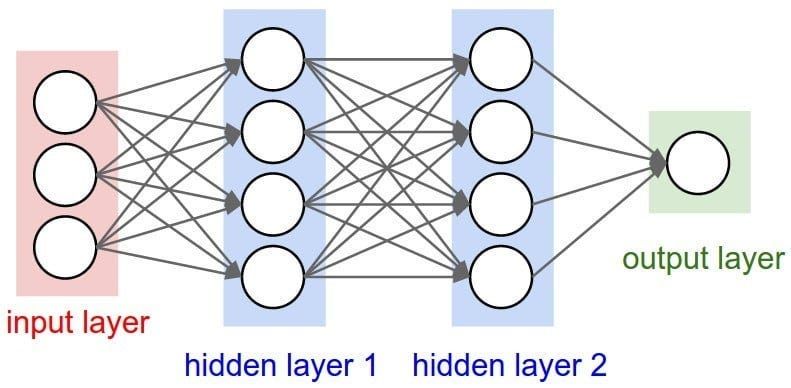

# Imports

In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dataset

In [7]:
df = pd.read_csv("breast-cancer.csv")
df.drop(columns=['id'],axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Train Test Split

In [8]:
# Encode target variable
encoder = LabelEncoder()

df['diagnosis'] = encoder.fit_transform(df['diagnosis'])  # M=1, B=0

# Features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scaling 

In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pipeline

In [10]:

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)


# Train model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [11]:
# Predict and evaluate
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Detection System

In [12]:
import numpy as np

new_sample = np.array([20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017,
                       0.1812, 0.05667, 0.5435, 0.7339, 3.398, 74.08, 0.005225,
                       0.01308, 0.0186, 0.0134, 0.01389, 0.002217, 24.99, 23.41,
                       158.8, 1956.0, 0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902])

# Reshape to match model input (1 sample, 30 features)
new_sample = new_sample.reshape(1, -1)

new_sample = scaler.transform(new_sample)

# Predict using the trained pipeline
prediction = mlp.predict(new_sample)
predicted_class = 'Malignant' if prediction[0] == 1 else 'Benign'

print(f"Prediction: {predicted_class}")


Prediction: Malignant


C:\Users\Noor Saeed\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
# A known benign sample (from the Wisconsin dataset)
# diagnosis: B
new_sample = np.array([13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781,
                       0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462,
                       0.0146, 0.02387, 0.01415, 0.0198, 0.0023, 14.67, 20.21,
                       94.49, 651.9, 0.1222, 0.1483, 0.1872, 0.1064, 0.3045, 0.07661])

# Reshape and predict
new_sample = new_sample.reshape(1, -1)
new_sample = scaler.transform(new_sample)

prediction = mlp.predict(new_sample)
predicted_class = 'Malignant' if prediction[0] == 1 else 'Benign'

print(f"Prediction: {predicted_class}")


Prediction: Benign


C:\Users\Noor Saeed\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
